**Import Libraries**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# We don't know the no. of clusters. So let's use K-Means and elbow method to choose this number of optimal clusters.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.duplicated().sum()

np.int64(0)

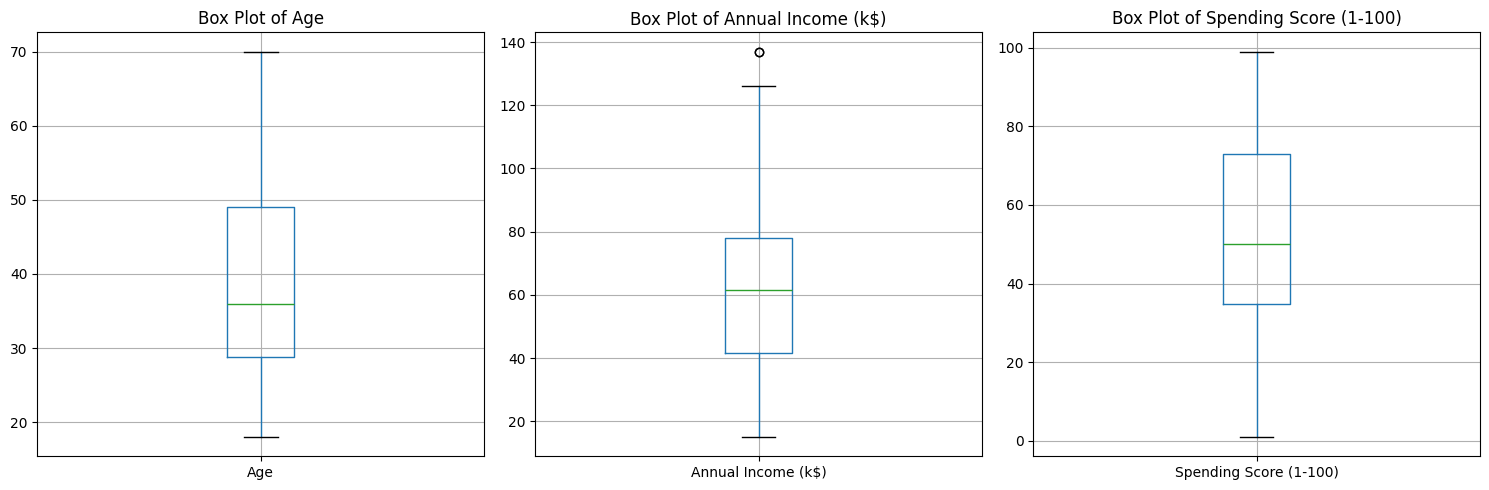

In [9]:
# Create box plots for numerical columns
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

**Encoding**

In [13]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

**Normalization / Standardisation function**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

**Elbow Method to find optimal k**

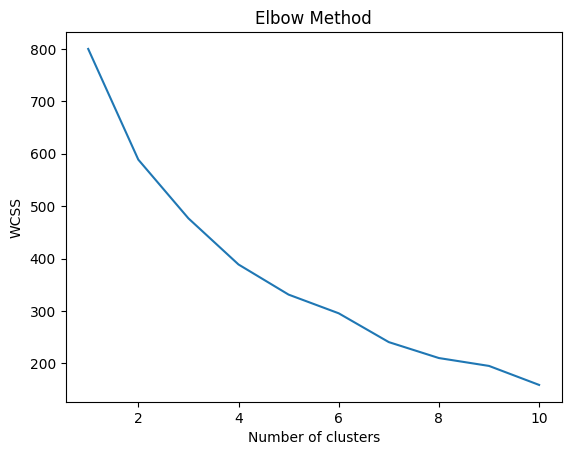

In [15]:
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(scaled_df) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia.
    # In WCSS list we will append all distances i.e if cluster is 10 what is the value,
    # if 9 what is value and so on upto 1.

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
wcss

[800.0000000000003,
 588.8026767824932,
 476.78755441351575,
 388.7654342841471,
 331.26499941323004,
 295.6204549737498,
 240.65014684541762,
 210.2344360566876,
 195.21890785961148,
 158.9742690150103]

In [17]:
kmeans = KMeans(n_clusters=4,random_state=0) # pass no. of clusters as 4
predict=kmeans.fit_predict(scaled_df)# assign cluster numbers to universities

In [18]:
predict

array([3, 3, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 3, 1, 2, 3, 3, 1, 2, 3, 1, 1, 3, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 3, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       3, 3], dtype=int32)

In [20]:
from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(scaled_df,predict)
kmeans_score

np.float64(0.2989559018050562)

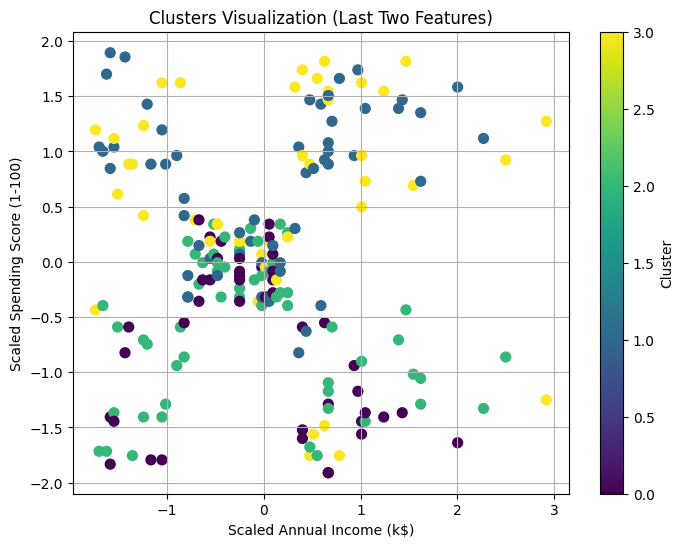

In [21]:
# Assuming 'predict' contains the cluster labels from the KMeans model
plt.figure(figsize=(8, 6))
plt.scatter(scaled_df[:, -2], scaled_df[:, -1], c=predict, cmap='viridis', s=50)
plt.title('Clusters Visualization (Last Two Features)')
plt.xlabel('Scaled Annual Income (k$)')
plt.ylabel('Scaled Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**Hyperparameter tuning using Silhouette score**

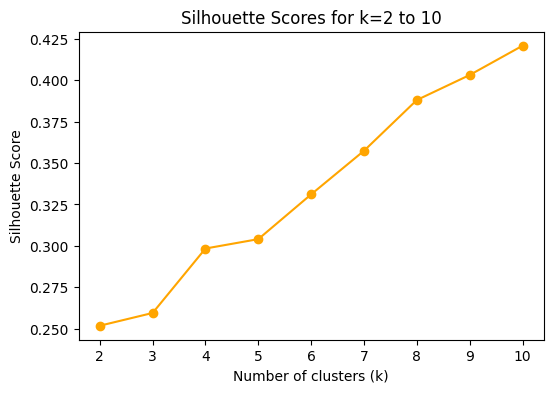

Optimal k by Silhouette: 10 with score 0.421
⚖️ Business Recommendation: Use k=5 (Elbow/interpretability), even though Silhouette suggests 10.


In [25]:
# Silhouette Scores
sil_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_df)
    sil_scores[k] = silhouette_score(scaled_df, labels)

# Plot Silhouette Scores
plt.figure(figsize=(6,4))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o', color='orange')
plt.title("Silhouette Scores for k=2 to 10")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Find best k by Silhouette
best_k_sil = max(sil_scores, key=sil_scores.get)
best_sil_score = sil_scores[best_k_sil]

print(f"Optimal k by Silhouette: {best_k_sil} with score {best_sil_score:.3f}")

# Practical Recommendation
# Rule of thumb: prefer 4–6 clusters if Silhouette suggests very high k
if best_k_sil > 6:
    recommended_k = 5  # business-friendly choice
    print(f"⚖️ Business Recommendation: Use k={recommended_k} (Elbow/interpretability), "
          f"even though Silhouette suggests {best_k_sil}.")
else:
    recommended_k = best_k_sil
    print(f"✅ Recommended k={recommended_k} (agrees with Silhouette & practical use).")

**Final Clustering with Recommended k**

In [26]:
kmeans_final = KMeans(n_clusters=recommended_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(scaled_df)

**PCA for 2D Visualization**

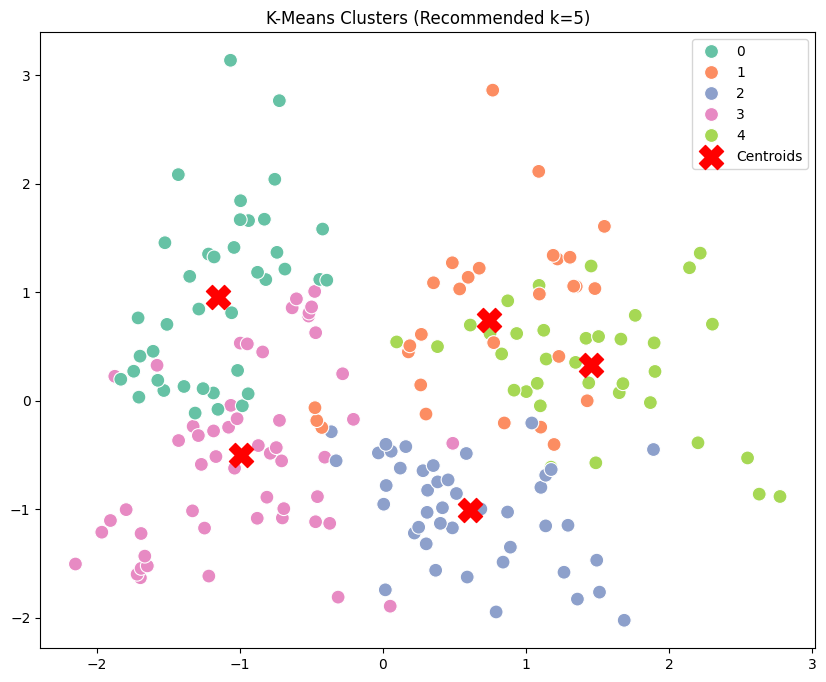

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

plt.figure(figsize=(10,8))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df['Cluster'],
    palette='Set2',
    s=100
)
plt.scatter(
    pca.transform(kmeans_final.cluster_centers_)[:,0],
    pca.transform(kmeans_final.cluster_centers_)[:,1],
    s=300, c='red', marker='X', label='Centroids'
)
plt.title(f"K-Means Clusters (Recommended k={recommended_k})")
plt.legend()
plt.show()

**Silhouette Score**

In [34]:
silhouette_avg = silhouette_score(scaled_df, df['Cluster'])
print(f"Silhouette Score for k={recommended_k}: {silhouette_avg:.3f}")

Silhouette Score for k=5: 0.304
